<a href="https://colab.research.google.com/github/RaahimAziz/Codsoft-Internship/blob/main/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Important Libraries:**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# **Loading our Dataset:**

In [40]:
file_path = "/content/Titanic-Dataset.csv"
data = pd.read_csv(file_path)
data_norm = data.copy()
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Data Cleaning:**

In [43]:
data_norm.isnull().sum()
data_norm["Age"].fillna(data_norm["Age"].median(), inplace = True)
data_norm["Embarked"].fillna(data_norm["Embarked"].mode()[0], inplace = True)
data_norm.drop("Cabin", axis = 1, inplace = True)
data_norm.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Encoding categorical variables:**

In [44]:
le = LabelEncoder()

data_norm["Sex"] = le.fit_transform(data_norm["Sex"])
data_norm["Embarked"] = le.fit_transform(data_norm["Embarked"])
data_norm.info()
data_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


# **Data Normalization:**

In [45]:
scaler = StandardScaler()
numeric_features = ["Age", "Fare"]
data_norm[numeric_features] = scaler.fit_transform(data_norm[numeric_features])
data_norm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2


# ***Correlation*:**

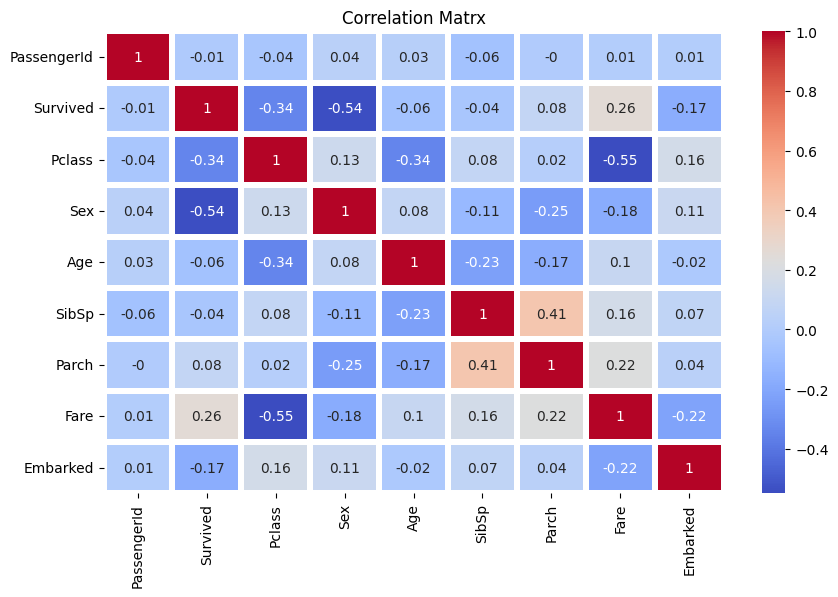

In [46]:
plt.figure(figsize=(10,6))
data_cor = data_norm[["PassengerId","Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
cor_matrix = round(data_cor.corr(),2)
sns.heatmap(cor_matrix, annot=True, cmap = "coolwarm", linewidth = 3)
plt.title("Correlation Matrx")
plt.show()

# **Descriptive Statistics:**

In [47]:
data_norm.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000
mean,446.000000,0.383838,2.308642,0.647587,2.272780e-16,0.523008,0.381594,3.987333e-18,1.536476
std,257.353842,0.486592,0.836071,0.477990,1.000562e+00,1.102743,0.806057,1.000562e+00,0.791503
min,1.000000,0.000000,1.000000,0.000000,-2.224156e+00,0.000000,0.000000,-6.484217e-01,0.000000
25%,223.500000,0.000000,2.000000,0.000000,-5.657365e-01,0.000000,0.000000,-4.891482e-01,1.000000
50%,446.000000,0.000000,3.000000,1.000000,-1.046374e-01,0.000000,0.000000,-3.573909e-01,2.000000
75%,668.500000,1.000000,3.000000,1.000000,4.333115e-01,1.000000,0.000000,-2.424635e-02,2.000000
max,891.000000,1.000000,3.000000,1.000000,3.891554e+00,8.000000,6.000000,9.667167e+00,2.000000


# **Barplots for categorical variables:**

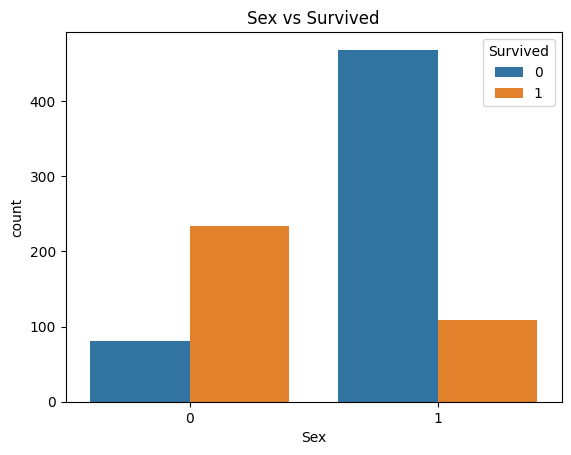

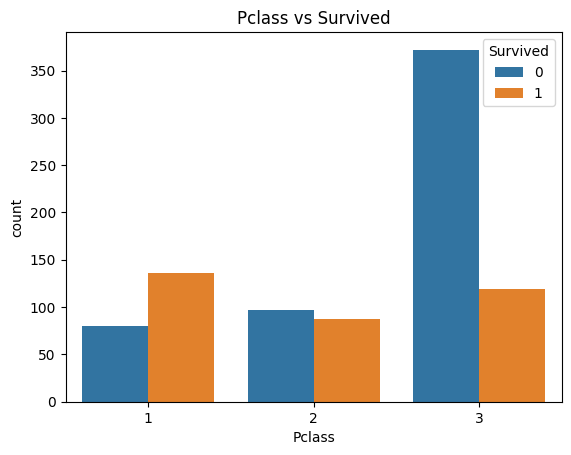

In [48]:
sns.countplot(data = data_norm, x = "Sex", hue = "Survived")
plt.title("Sex vs Survived")
plt.show()

sns.countplot(data = data_norm, x = "Pclass", hue = "Survived")
plt.title("Pclass vs Survived")
plt.show()

# **Scatter plots of numeric variables with output:**

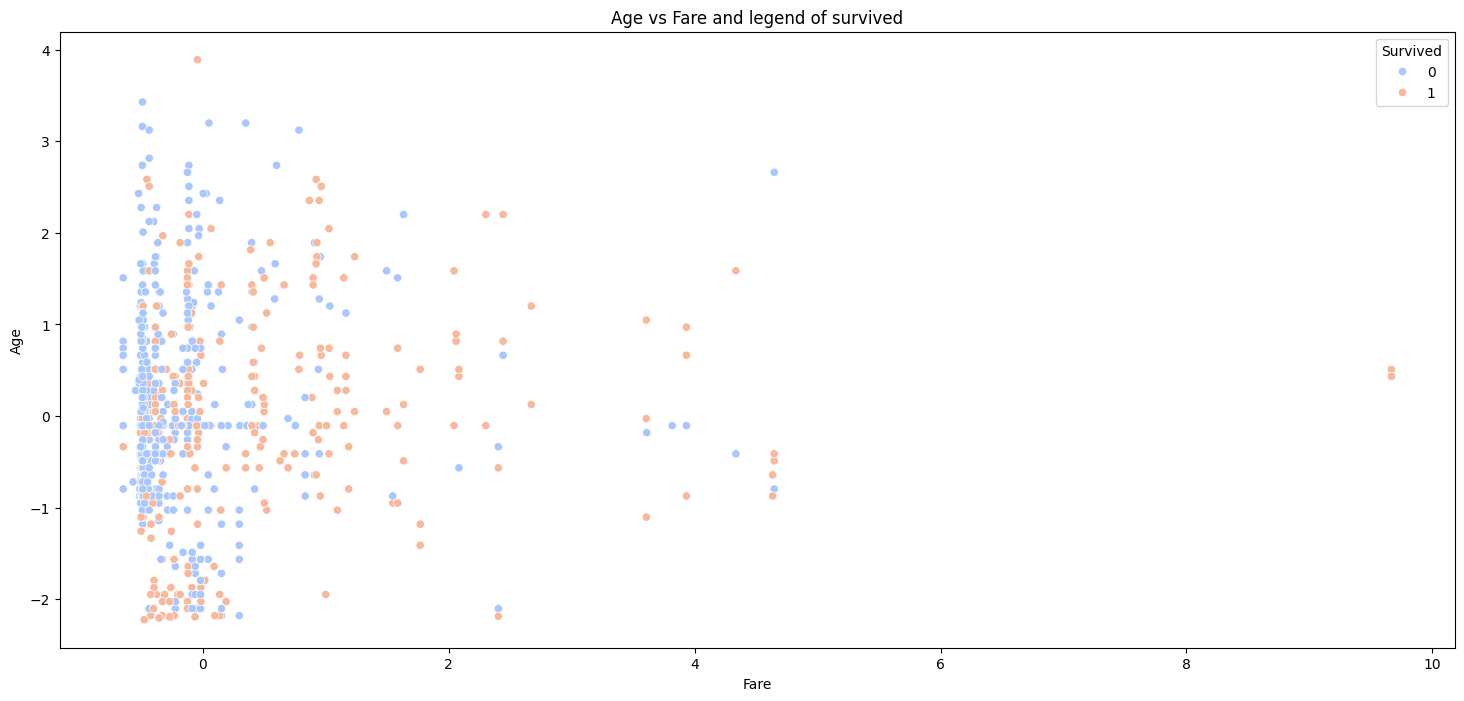

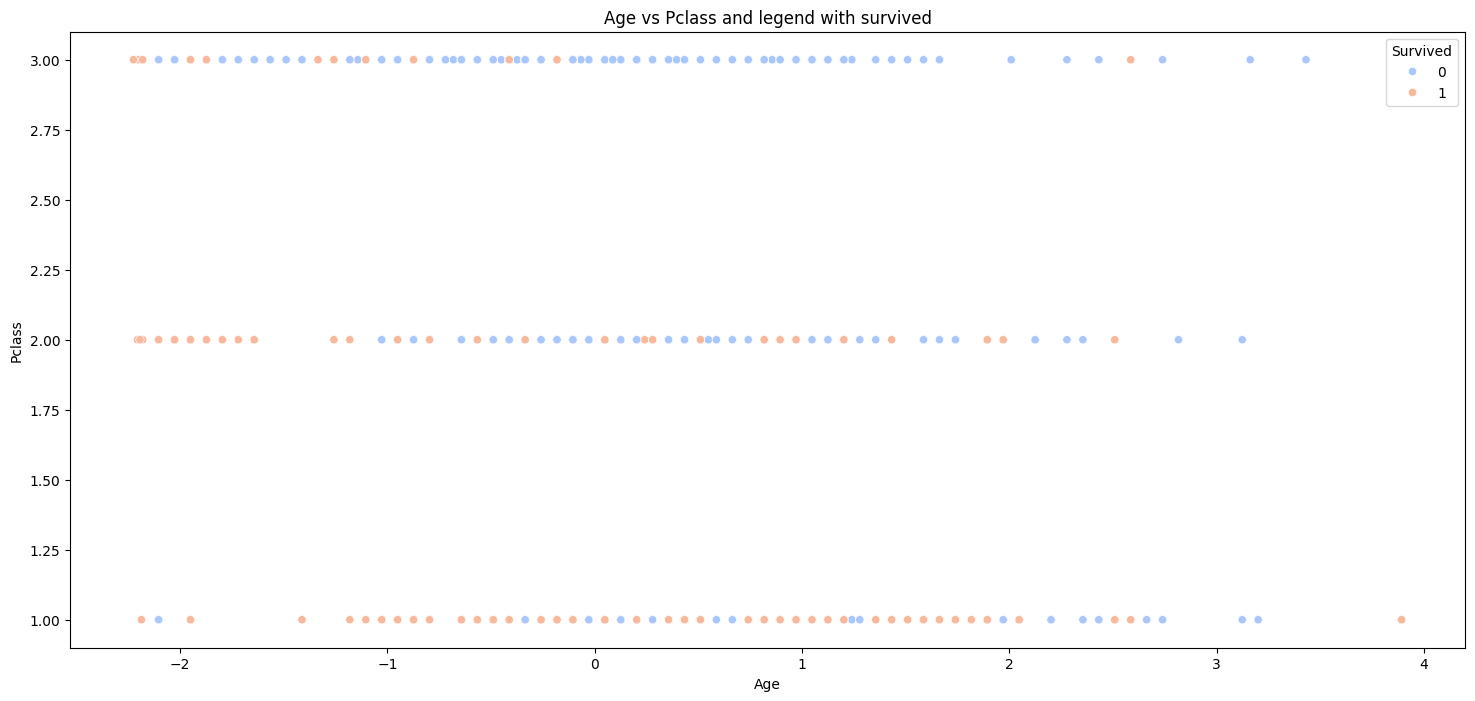

In [49]:
plt.figure(figsize = (18,8))
sns.scatterplot(data = data_norm, x = "Fare", y = "Age", hue = "Survived", palette = "coolwarm")
plt.title("Age vs Fare and legend of survived")
plt.show()

plt.figure(figsize = (18,8))
sns.scatterplot(data = data_norm, x = "Age", y = "Pclass", hue = "Survived", palette = "coolwarm")
plt.title("Age vs Pclass and legend with survived")
plt.show()

# **Pairplot for all variables:**



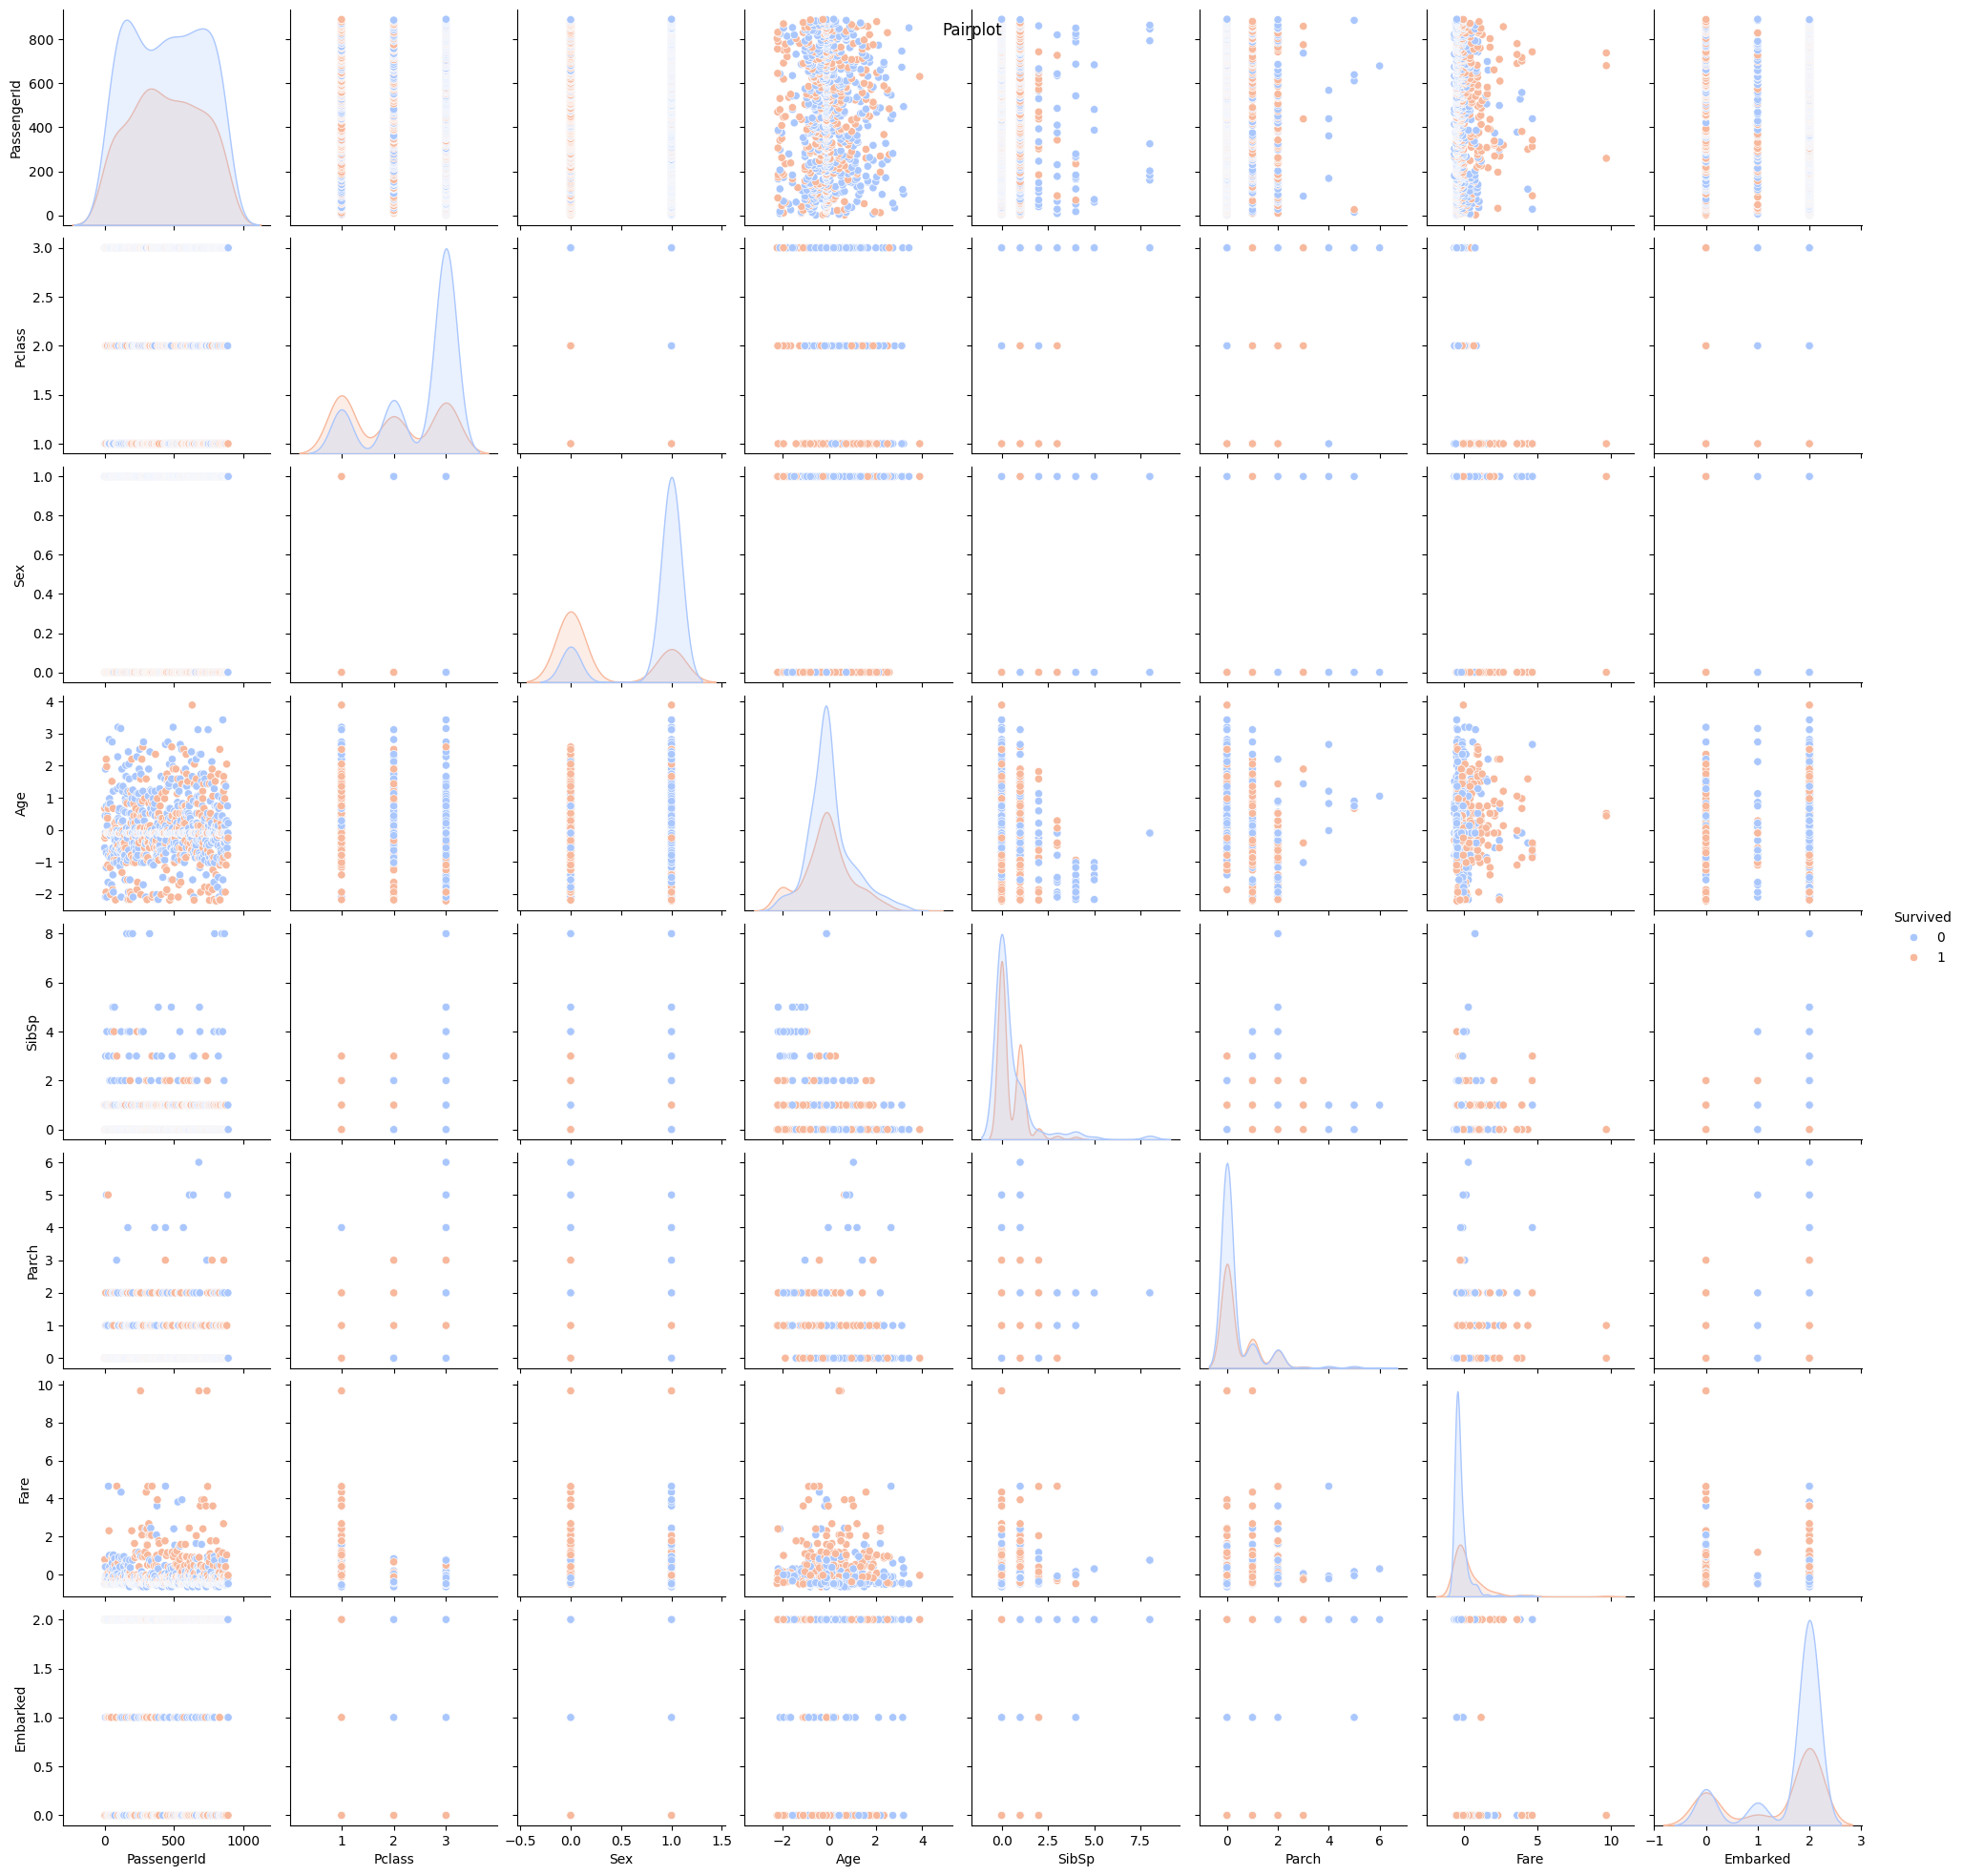

In [30]:
sns.pairplot(data_cor, hue = "Survived", palette="coolwarm")
plt.suptitle("Pairplot")
plt.show()

# **Barplot of Age group with survived:**

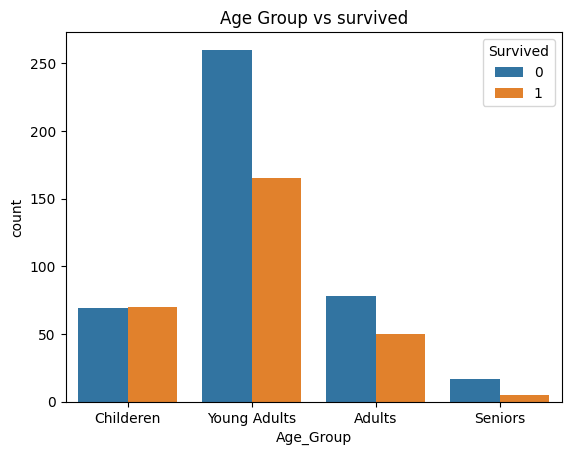

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2


In [52]:
data["Age_Group"] = pd.cut(data["Age"], bins = [0,18,40,60,80], labels = ["Childeren", "Young Adults", "Adults", "Seniors"])
sns.countplot(data = data, x = "Age_Group", hue = "Survived")
plt.title("Age Group vs survived")
plt.show()
data_norm.head()

# **Splitting the Data:**

In [57]:
x = data_norm.drop(["Survived", "Name","PassengerId", "Ticket"], axis = 1)
y = data_norm["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


# **Logistic Regression:**

In [61]:
logmod = LogisticRegression()
logmod.fit(x_train, y_train)
logpred = logmod.predict(x_test)
logpred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

# **Decision Tree:**

In [65]:
decmod = DecisionTreeClassifier(random_state=42)
decmod.fit(x_train, y_train)
decpred = decmod.predict(x_test)
decpred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

# **Random Forest**

In [66]:
ranmod = RandomForestClassifier(random_state=42)
ranmod.fit(x_train, y_train)
ranpred = ranmod.predict(x_test)
ranpred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

# **Model Evaluation:**

In [70]:
print("\n Logistic Regression Report:\n", classification_report(y_test, logpred))
print("\n Logistic Regression Accuracy:\n", accuracy_score(y_test, logpred))

print("\n Decision Tree Report\n", classification_report(y_test,decpred))
print("\n Decision Tree Accuracy\n", accuracy_score(y_test,decpred))

print("\n Random Forest Report\n", classification_report(y_test, ranpred))
print("\n Random Forest Report\n", accuracy_score(y_test, ranpred))


 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


 Logistic Regression Accuracy:
 0.8100558659217877

 Decision Tree Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179


 Decision Tree Accuracy
 0.7821229050279329

 Random Forest Report
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    ac